<a href="https://colab.research.google.com/github/phatnguyenthuan1502/Remaining-Useful-Life-Assessment-of-Bypass-and-Blocking-Diodes-in-Photovoltaic-Arrays/blob/main/WT_CNN_GRU_time_series_analysis_(data_0)(split_0)(WT_use_cA_and_cD)(WT_1_level)(CNN_uses_LeakyReLU)(1_fully_connected_layers)(find_LC_from_temp_and_Nf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
book = pd.ExcelFile('Data for ML TT-DB0.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

temp = sheet.loc[:,"Temperature"]
nf = sheet.loc[:,"Nf"]
lc = sheet.loc[:,"LC"]


print(pd.Series(temp).array)
print(pd.Series(nf).array)
print(pd.Series(lc).array)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[41090.5061075265, 39607.9167484446, 39237.7021284893, 38280.1016563549,
 49376.1002417963, 36766.2488161939,  35987.539636953,   37974.03129662,
 34512.2493018107, 48315.0959072694,
 ...
 53365.4528603779, 37203.2022351574, 50240.0562554178, 40441.3650671086,
 41569.4387577175, 53495.5587959451, 46559.4539687279, 45999.9230542643,
 35568.2691226242, 35616.6976337195]
Length: 485, dtype: float64
<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01

In [5]:
temp = pd.Series(temp).array
nf = pd.Series(nf).array
lc = pd.Series(lc).array

print(temp)
print(nf)
print(lc)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[41090.5061075265, 39607.9167484446, 39237.7021284893, 38280.1016563549,
 49376.1002417963, 36766.2488161939,  35987.539636953,   37974.03129662,
 34512.2493018107, 48315.0959072694,
 ...
 53365.4528603779, 37203.2022351574, 50240.0562554178, 40441.3650671086,
 41569.4387577175, 53495.5587959451, 46559.4539687279, 45999.9230542643,
 35568.2691226242, 35616.6976337195]
Length: 485, dtype: float64
<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01

In [6]:
temp_new = []
for str_temp in temp:
  str_new = str_temp.replace("TT ","")
  str_new = str_new.replace("'","")
  temp_new.append(int(str_new))

In [7]:
temp_new

[41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 95,
 98,
 101,
 104,
 107,
 110,
 113,
 116,
 119,
 122,
 125,
 102,
 105,
 108,
 111,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 42,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 39,
 42,


In [8]:
nf = nf/1000

print(nf)

<PandasArray>
[41.090506107526494,   39.6079167484446, 39.237702128489296,
   38.2801016563549,   49.3761002417963,   36.7662488161939,
    35.987539636953,     37.97403129662,   34.5122493018107,
   48.3150959072694,
 ...
  53.36545286037791,   37.2032022351574, 50.240056255417805,
   40.4413650671086,   41.5694387577175,   53.4955587959451,
   46.5594539687279,   45.9999230542643,   35.5682691226242,
 35.616697633719504]
Length: 485, dtype: float64


In [9]:
lc = lc*1000000

print(lc)

<PandasArray>
[  36.5047827854631,   37.8712167450439, 38.228538335095195,
   39.1848489187851,   91.1372096614223,   40.7982877855985,
   41.6810933765463,   65.8344640965869,   43.4628292952584,
    134.53352162387,
 ...
     121.8016460388,   40.3191099120625,   9.95221815552966,
   12.3635787063641,   60.1403356579085, 121.50541365113601,
   96.6506180038638,  97.82625059375701,   14.0574734822269,
 42.115078029578406]
Length: 485, dtype: float64


In [10]:
temp_new = np.array(temp_new)
nf = np.array(nf)
lc = np.array(lc)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from numpy import array
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf
import pywt

In [12]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [13]:
wavelet = 'db1'
mode = 'periodic'
num_level = 1

In [14]:
a = [1,2,3,4,5,6,7,8,9]
get_wave(a, wavelet, num_level, mode)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172,  7.07106781]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  5.65685425])]

In [15]:
a = [1,2]
get_wave(a, wavelet, num_level, mode)

[array([2.12132034]), array([-0.70710678])]

In [16]:
a = [3,4]
get_wave(a, wavelet, num_level, mode)

[array([4.94974747]), array([-0.70710678])]

In [17]:
a = [5,6]
get_wave(a, wavelet, num_level, mode)

[array([7.77817459]), array([-0.70710678])]

In [18]:
a = [7,8]
get_wave(a, wavelet, num_level, mode)

[array([10.60660172]), array([-0.70710678])]

In [19]:
a = [9,1]
get_wave(a, wavelet, num_level, mode)

[array([7.07106781]), array([5.65685425])]

In [20]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [21]:
# define input sequence
in_seq1 = temp_new
in_seq2 = nf
out_seq = lc
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(485, 1, 2) (485,)
[[41.         41.09050611]] 36.5047827854631
[[44.         39.60791675]] 37.8712167450439
[[47.         39.23770213]] 38.228538335095195
[[50.         38.28010166]] 39.1848489187851
[[53.         49.37610024]] 91.1372096614223
[[56.         36.76624882]] 40.7982877855985
[[59.         35.98753964]] 41.6810933765463
[[62.        37.9740313]] 65.8344640965869
[[65.        34.5122493]] 43.4628292952584
[[68.         48.31509591]] 134.53352162387
[[71.         43.99309465]] 125.019620548907
[[74.         46.27433095]] 140.466644605959
[[77.         39.42034014]] 126.838073506385
[[80.         43.68792463]] 148.782530979869
[[83.         46.87624493]] 159.995750744629
[[86.         49.29432037]] 172.43365840586898
[[89.         42.30730843]] 153.637757677686
[[92.        47.4898895]] 178.985465950395
[[40.         69.05736232]] 144.807152549981
[[43.         59.21081419]] 126.66605082537001
[[46.         54.28823182]] 119.731289494877
[[49.         43.15276192]] 81.107207

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

348
348
88
88
49
49


In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [26]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [27]:
for i in range(len(X_train)):
	print(X_train[i], y_train[i])

[[41.       41.090508]] 36.504784
[[44.       39.607918]] 37.871216
[[47.     39.2377]] 38.22854
[[50.     38.2801]] 39.18485
[[53.     49.3761]] 91.13721
[[56.      36.76625]] 40.798286
[[59.      35.98754]] 41.681095
[[62.      37.97403]] 65.834465
[[65.      34.51225]] 43.46283
[[68.       48.315098]] 134.53352
[[71.       43.993095]] 125.01962
[[74.      46.27433]] 140.46664
[[77.      39.42034]] 126.83807
[[80.       43.687923]] 148.78253
[[83.       46.876244]] 159.99576
[[86.      49.29432]] 172.43365
[[89.      42.30731]] 153.63776
[[92.      47.48989]] 178.98546
[[40.       69.057365]] 144.80716
[[43.       59.210815]] 126.66605
[[46.      54.28823]] 119.73129
[[49.       43.152763]] 81.10721
[[52.      45.24866]] 99.450455
[[55.       41.307056]] 84.731285
[[58.       40.438698]] 86.55076
[[61.       48.656235]] 133.59029
[[64.      38.76669]] 90.28369
[[67.      43.69458]] 125.87374
[[70.       42.783318]] 128.55478
[[73.       36.552757]] 95.752014
[[76.       33.489403]] 7

In [28]:
for i in range(len(X_val)):
	print(X_val[i], y_val[i])

[[71.       52.938915]] 170.00726
[[74.      45.37029]] 154.286
[[77.      47.62028]] 167.99565
[[80.       52.914326]] 188.98474
[[83.       46.053455]] 173.71118
[[86.       40.973133]] 134.2343
[[36.      44.76422]] 33.508904
[[39.       60.483284]] 132.26794
[[42.      82.58849]] 169.51514
[[45.      97.62819]] 184.37299
[[48.      87.19993]] 172.0185
[[ 51.      110.56135]] 194.46217
[[ 54.      116.46499]] 201.77737
[[ 57.      131.06876]] 209.81354
[[ 60.      137.02846]] 218.93263
[[ 63.      125.83087]] 222.5209
[[66.      92.66365]] 210.4385
[[69.      80.20182]] 205.731
[[72.     82.3818]] 212.42557
[[75.      77.80698]] 212.06325
[[78.       82.848564]] 223.29898
[[81.       77.809425]] 224.9085
[[84.      79.92167]] 231.47664
[[87.      75.29369]] 232.42319
[[90.       55.464153]] 207.34113
[[93.       49.227394]] 203.13892
[[96.      48.65791]] 195.24062
[[99.       44.765915]] 189.8766
[[102.       52.08219]] 220.80484
[[105.        33.778305]] 148.024
[[38.       76.887

In [29]:
train_temp_wave = np.array(get_wave(X_train.T[0][0], wavelet, num_level, mode))
train_nf_wave = np.array(get_wave(X_train.T[1][0], wavelet, num_level, mode))
train_lc_wave = np.array(get_wave(y_train, wavelet, num_level, mode))
val_temp_wave = np.array(get_wave(X_val.T[0][0], wavelet, num_level, mode))
val_nf_wave = np.array(get_wave(X_val.T[1][0], wavelet, num_level, mode))
val_lc_wave = np.array(get_wave(y_val, wavelet, num_level, mode))
test_temp_wave = np.array(get_wave(X_test.T[0][0], wavelet, num_level, mode))
test_nf_wave = np.array(get_wave(X_test.T[1][0], wavelet, num_level, mode))
test_lc_wave = np.array(get_wave(y_test, wavelet, num_level, mode))

In [30]:
train_temp_wave_new = np.concatenate((train_temp_wave[0], train_temp_wave[1]))
train_nf_wave_new = np.concatenate((train_nf_wave[0], train_nf_wave[1]))
train_lc_wave_new = np.concatenate((train_lc_wave[0], train_lc_wave[1]))
val_temp_wave_new = np.concatenate((val_temp_wave[0], val_temp_wave[1]))
val_nf_wave_new = np.concatenate((val_nf_wave[0], val_nf_wave[1]))
val_lc_wave_new = np.concatenate((val_lc_wave[0], val_lc_wave[1]))
test_temp_wave_new = np.concatenate((test_temp_wave[0], test_temp_wave[1]))
test_nf_wave_new = np.concatenate((test_nf_wave[0], test_nf_wave[1]))
test_lc_wave_new = np.concatenate((test_lc_wave[0], test_lc_wave[1]))

In [31]:
hstack((train_temp_wave_new, train_nf_wave_new, train_lc_wave_new))

array([ 60.104073 ,  68.589355 ,  77.07464  , ...,  19.115805 ,
        -7.6256256, -15.138428 ], dtype=float32)

In [32]:
#TRAIN_SET
# define input sequence
in_seq1 = train_temp_wave_new
in_seq2 = train_nf_wave_new
out_seq = train_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_train = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_train_wave, y_train_wave = split_sequences(dataset_train, n_steps)
print(X_train_wave.shape, y_train_wave.shape)
# summarize the data
for i in range(len(X_train_wave)):
	print(X_train_wave[i], y_train_wave[i])

(348, 1, 2) (348,)
[[60.104073 57.0624  ]] 52.591774
[[68.589355 54.813362]] 54.739532
[[77.07464 60.91184]] 93.29248
[[85.55992 52.29873]] 76.02498
[[94.0452  58.56778]] 125.86243
[[102.53049  63.82871]] 187.72714
[[111.01576  58.76642]] 194.89319
[[119.501045  68.00285 ]] 235.06308
[[127.98633  63.49621]] 235.20013
[[58.689865 90.699295]] 191.96054
[[67.17514  68.901184]] 142.01427
[[75.66042  61.204132]] 130.23616
[[84.145706 62.999626]] 155.66322
[[92.63098 58.30892]] 152.84637
[[101.11627   56.099075]] 158.60886
[[109.60155   50.857132]] 135.57784
[[ 57.27565 124.72684]] 161.88702
[[ 65.760925 150.50128 ]] 252.39792
[[ 74.246216 129.05804 ]] 263.4862
[[ 82.73149 146.92625]] 279.0689
[[ 91.216774 110.9317  ]] 274.60492
[[ 99.70206 111.50165]] 291.54233
[[108.18733  99.93619]] 294.82074
[[116.67262 110.50326]] 320.76166
[[125.1579  101.86322]] 333.80673
[[133.64319 103.1491 ]] 339.32977
[[142.12846  79.48796]] 320.23682
[[150.61374   54.594788]] 246.58446
[[159.09903   56.170856]] 2

In [33]:
#VAL_SET
# define input sequence
in_seq1 = val_temp_wave_new
in_seq2 = val_nf_wave_new
out_seq = val_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_val = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_val_wave, y_val_wave = split_sequences(dataset_val, n_steps)
print(X_val_wave.shape, y_val_wave.shape)
# summarize the data
for i in range(len(X_val_wave)):
	print(X_val_wave[i], y_val_wave[i])

(88, 1, 2) (88,)
[[102.53049  69.51511]] 229.30997
[[111.01576  71.0887 ]] 252.42325
[[119.501045  61.537086]] 217.75034
[[53.033005 74.42122 ]] 117.22193
[[ 61.518288 127.432434]] 250.2367
[[ 70.00357 139.83835]] 259.14096
[[ 78.488846 175.03278 ]] 291.0387
[[ 86.97414 185.86961]] 312.1548
[[ 95.45941  122.234344]] 294.27628
[[103.944695 113.27057 ]] 300.1589
[[112.42998  113.602356]] 316.93054
[[120.91525 109.75383]] 328.0267
[[129.40054  74.02811]] 290.25323
[[137.88582  66.06062]] 272.31897
[[146.3711   60.71254]] 260.8014
[[ 55.861435 123.87776 ]] 181.47108
[[ 64.34671 207.18164]] 265.58972
[[ 72.832   192.53592]] 276.9063
[[ 81.317276 208.24141 ]] 304.94083
[[ 89.80256 249.034  ]] 316.99982
[[ 98.28784 245.74445]] 329.484
[[106.77312 227.41489]] 340.78534
[[115.25841 206.04329]] 359.17575
[[123.74368 264.30157]] 369.41553
[[132.22897 204.84888]] 380.66663
[[140.71425 191.95435]] 383.20743
[[149.19952 117.537  ]] 369.24768
[[157.68481 126.40163]] 381.61142
[[166.17009  72.51955]] 

In [34]:
#TEST_SET
# define input sequence
in_seq1 = test_temp_wave_new
in_seq2 = test_nf_wave_new
out_seq = test_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_test = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_test_wave, y_test_wave = split_sequences(dataset_test, n_steps)
print(X_test_wave.shape, y_test_wave.shape)
# summarize the data
for i in range(len(X_test_wave)):
	print(X_test_wave[i], y_test_wave[i])

(50, 1, 2) (50,)
[[ 67.17514 150.52533]] 259.34625
[[ 75.66042 226.5945 ]] 291.25043
[[ 84.145706 194.63336 ]] 303.17316
[[ 92.63098 207.32799]] 303.8913
[[101.11627 188.83496]] 322.94873
[[109.60155 183.82825]] 342.27032
[[118.08683   94.036224]] 268.96906
[[57.27565 85.24036]] 105.95526
[[ 65.760925 113.741806]] 227.63155
[[ 74.246216 136.25815 ]] 275.40613
[[ 82.73149 139.15088]] 280.28186
[[ 91.216774 155.98312 ]] 294.9622
[[ 99.70206 172.91162]] 312.2725
[[108.18733 167.94214]] 327.1114
[[116.67262 129.69238]] 323.62872
[[125.1579  115.24138]] 325.09076
[[133.64319  82.57474]] 282.6567
[[142.12846   51.062077]] 166.33841
[[55.861435 63.094444]] 102.90584
[[64.34671 69.1772 ]] 141.78458
[[62.225395 61.83172 ]] 35.547195
[[58.689865 57.990395]] 51.26801
[[67.17514 70.74958]] 154.25961
[[74.953316 57.67742 ]] 79.11373
[[ 72.832   108.82088]] 158.31291
[[-2.1213188 16.746803 ]] -2.2801514
[[-2.1213226 16.97232  ]] 0.25068665
[[-2.1213226  2.210472 ]] -3.4431763
[[-2.1213188  1.8792267

In [35]:
def get_cA(wave, num_level):
  return(wave[:len(wave)//(2*num_level)])

def get_cD(wave, level, num_level):
  i = 0
  temp_wave = wave
  while(i<level):
    cD = temp_wave[len(temp_wave)//2:]
    temp_wave = temp_wave[:len(temp_wave)//2]
    i = i + 1
  return cD

In [36]:
get_cA(train_nf_wave_new, num_level)

array([ 57.0624  ,  54.813362,  60.91184 ,  52.29873 ,  58.56778 ,
        63.82871 ,  58.76642 ,  68.00285 ,  63.49621 ,  90.699295,
        68.901184,  61.204132,  62.999626,  58.30892 ,  56.099075,
        50.857132, 124.72684 , 150.50128 , 129.05804 , 146.92625 ,
       110.9317  , 111.50165 ,  99.93619 , 110.50326 , 101.86322 ,
       103.1491  ,  79.48796 ,  54.594788,  56.170856,  53.731422,
        64.729675,  84.65314 ,  78.52411 ,  75.65227 ,  90.45118 ,
       104.898636, 106.056564,  83.020546,  87.21474 ,  63.385162,
        57.143898,  62.190998,  62.88224 ,  62.461098,  55.640682,
        64.49761 ,  66.8058  ,  66.344055,  71.08626 ,  79.35487 ,
        84.63992 , 112.158554,  97.629395, 106.46918 ,  65.930214,
        60.974777,  52.705162,  84.863235,  61.842674,  71.18204 ,
        70.14316 ,  65.486244,  68.1755  ,  86.471054,  93.93977 ,
        70.509964,  73.312485,  86.25975 ,  75.99231 , 147.85402 ,
       173.01999 , 131.45297 ,  64.53766 ,  66.63333 ,  70.528

In [37]:
get_cD(train_nf_wave_new, 1, num_level)

array([  1.0483494 ,   0.67712593,   8.916508  ,  -1.4046593 ,
        -9.760088  ,  -1.6130791 ,  -3.0176373 ,  -1.7098389 ,
        -3.6646404 ,   6.9625587 ,   7.873966  ,   2.7871342 ,
        -5.8106747 ,  -3.4845467 ,   4.40567   ,  -3.4959621 ,
        -5.0008545 ,  11.14856   ,   1.5677109 ,   1.1601105 ,
        -6.9033203 ,   8.895443  ,  10.708683  ,  -8.755623  ,
         0.89577484,   0.6895828 ,  17.044245  ,   3.9838047 ,
        -1.3213654 ,   9.992403  ,  -9.638348  ,   6.5256157 ,
         3.5764275 ,   5.226734  ,  -7.538727  ,  -2.302597  ,
         4.6233826 ,   3.0294342 ,  -0.36734772,   9.587507  ,
        -1.326601  ,  -0.8764496 ,   2.8602123 ,   0.29711342,
         4.712143  ,   7.4938946 ,  -1.1715393 ,   0.5420151 ,
        -1.0053024 ,  -3.8617935 ,  -4.525467  ,   1.0202065 ,
         5.065235  ,  18.768486  , -20.660156  ,  20.124193  ,
       -13.154871  ,   3.4178162 , -10.236494  ,  -4.493248  ,
         2.4040413 ,  -3.9250164 ,   0.6726074 ,   0.83

In [38]:
from keras import backend as K
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [39]:
X_train_wave.shape

(348, 1, 2)

In [114]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(4,return_sequences=True))
model.add(GRU(60, input_shape=(1, n_features)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [115]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [116]:
# fit model
history = model.fit(X_train_wave, y_train_wave, epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(X_val_wave, y_val_wave))

Epoch 1/2000
11/11 - 4s - loss: 23003.7031 - mse: 23003.7031 - mae: 106.0101 - rmse: 151.6697 - rmspe: 1.0090 - mape: 99.3422 - val_loss: 38274.8125 - val_mse: 38274.8125 - val_mae: 140.4430 - val_rmse: 195.6395 - val_rmspe: 2.0858 - val_mape: 127.0504 - 4s/epoch - 360ms/step
Epoch 2/2000
11/11 - 0s - loss: 22248.2910 - mse: 22248.2910 - mae: 103.6707 - rmse: 149.1586 - rmspe: 1.0351 - mape: 97.8414 - val_loss: 37229.8516 - val_mse: 37229.8516 - val_mae: 138.2045 - val_rmse: 192.9504 - val_rmspe: 3.4444 - val_mape: 157.7650 - 83ms/epoch - 8ms/step
Epoch 3/2000
11/11 - 0s - loss: 21451.3535 - mse: 21451.3535 - mae: 101.1463 - rmse: 146.4628 - rmspe: 1.0786 - mape: 96.1044 - val_loss: 36000.8477 - val_mse: 36000.8477 - val_mae: 135.7944 - val_rmse: 189.7389 - val_rmspe: 5.2686 - val_mape: 203.6780 - 78ms/epoch - 7ms/step
Epoch 4/2000
11/11 - 0s - loss: 20465.1484 - mse: 20465.1484 - mae: 98.1031 - rmse: 143.0565 - rmspe: 1.2952 - mape: 99.9711 - val_loss: 34625.5391 - val_mse: 34625.5391

In [117]:
import matplotlib.pyplot as plt
import math

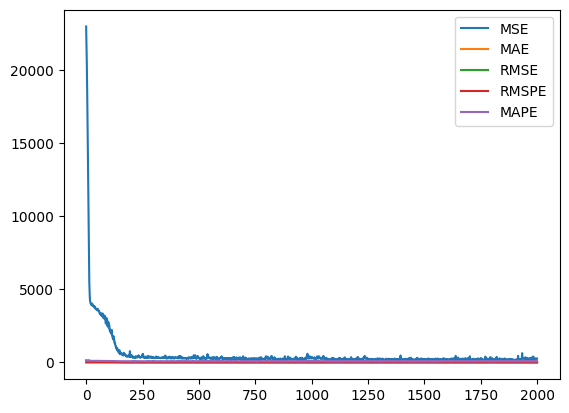

In [118]:
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['rmse'])
plt.plot(history.history['rmspe'])
plt.plot(history.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

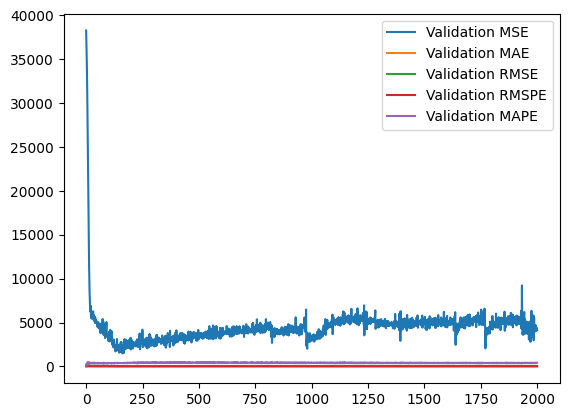

In [119]:
plt.plot(history.history['val_mse'])
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_rmse'])
plt.plot(history.history['val_rmspe'])
plt.plot(history.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

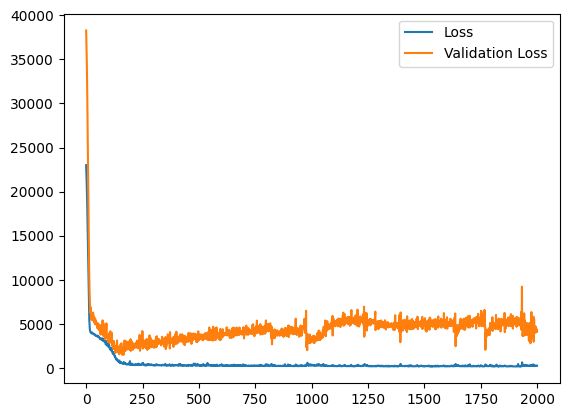

In [120]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

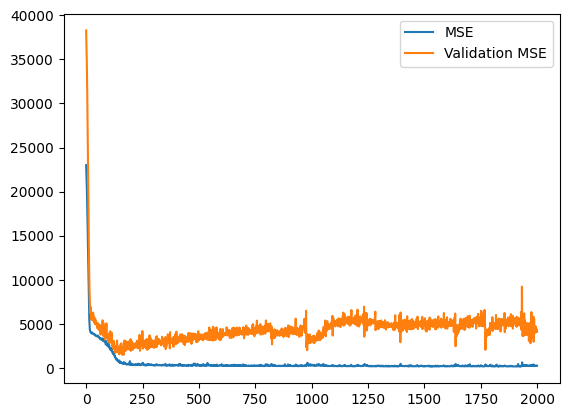

In [121]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.legend(['MSE', 'Validation MSE'])
plt.show()

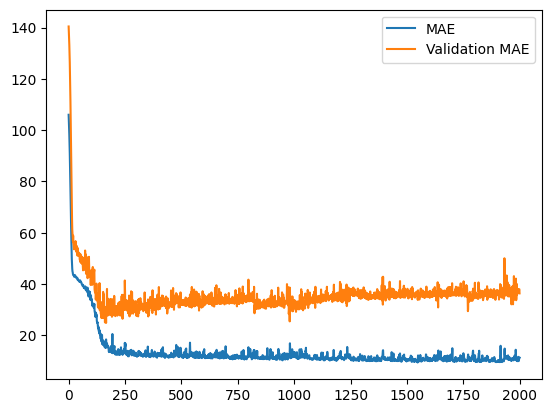

In [122]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

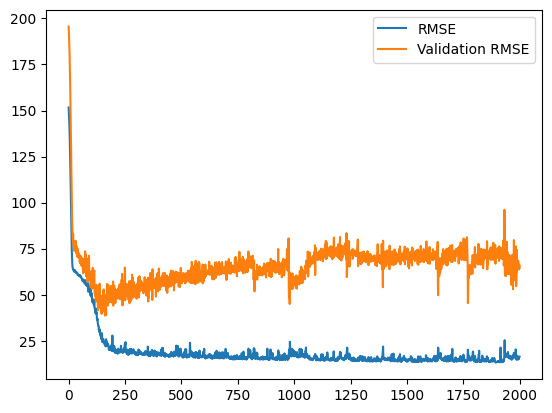

In [123]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

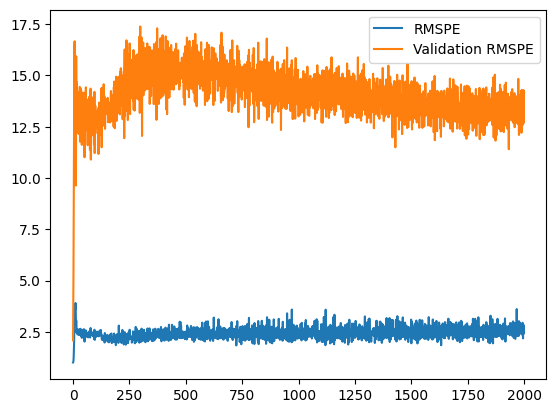

In [124]:
plt.plot(history.history['rmspe'])
plt.plot(history.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

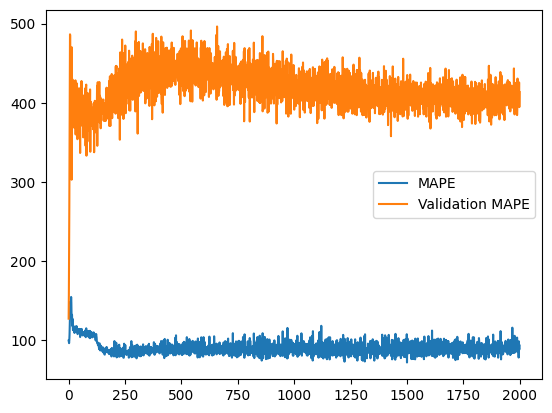

In [125]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

In [126]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [127]:
preds_wave = predict_all(model, X_test_wave)
print(preds_wave)

[187.08752, 5.597084, 206.12279, 213.34589, 312.26306, 289.80432, 318.81323, 174.07922, 237.71964, 281.5086, 279.0182, 286.11505, 288.9146, 289.44745, 305.87433, 330.23956, 342.03778, 236.57803, 77.89432, 141.43214, 103.879814, 72.69448, 158.48325, 111.969986, 248.76402, 24.795347, 25.583572, 1.1745309, 0.151421, -21.60572, -38.494606, 69.83615, -3.457917, -18.062208, 19.961205, 0.90071946, 11.881088, -11.0250635, -10.208772, 22.024504, 24.159384, 25.316282, -3.1523798, -10.973447, -13.02396, -61.875237, 5.324211, 13.138142, 18.187, -39.35669]


In [128]:
for i in range(len(y_test_wave)):
	print(y_test_wave[i],"; ", preds_wave[i])

259.34625 ;  187.08752
291.25043 ;  5.597084
303.17316 ;  206.12279
303.8913 ;  213.34589
322.94873 ;  312.26306
342.27032 ;  289.80432
268.96906 ;  318.81323
105.95526 ;  174.07922
227.63155 ;  237.71964
275.40613 ;  281.5086
280.28186 ;  279.0182
294.9622 ;  286.11505
312.2725 ;  288.9146
327.1114 ;  289.44745
323.62872 ;  305.87433
325.09076 ;  330.23956
282.6567 ;  342.03778
166.33841 ;  236.57803
102.90584 ;  77.89432
141.78458 ;  141.43214
35.547195 ;  103.879814
51.26801 ;  72.69448
154.25961 ;  158.48325
79.11373 ;  111.969986
158.31291 ;  248.76402
-2.2801514 ;  24.795347
0.25068665 ;  25.583572
-3.4431763 ;  1.1745309
-2.7544708 ;  0.151421
-4.457184 ;  -21.60572
-5.575119 ;  -38.494606
69.72061 ;  69.83615
-36.279507 ;  -3.457917
-27.148926 ;  -18.062208
-3.6345367 ;  19.961205
1.7200012 ;  0.90071946
-2.0410461 ;  11.881088
-3.459259 ;  -11.0250635
-7.815201 ;  -10.208772
3.5432587 ;  22.024504
3.8369904 ;  24.159384
39.040924 ;  25.316282
6.648781 ;  -3.1523798
-5.9461937 

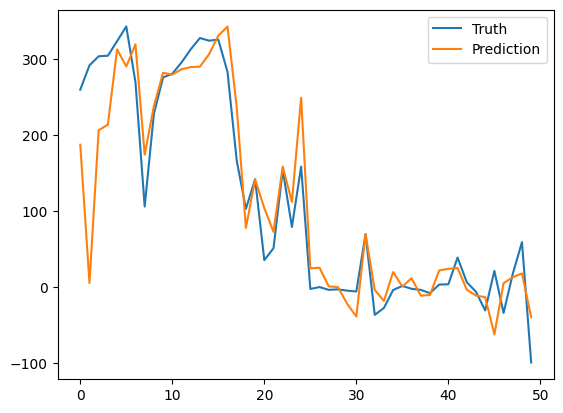

In [129]:
plt.plot(y_test_wave)
plt.plot(preds_wave)
plt.legend(['Truth', 'Prediction'])
plt.show()

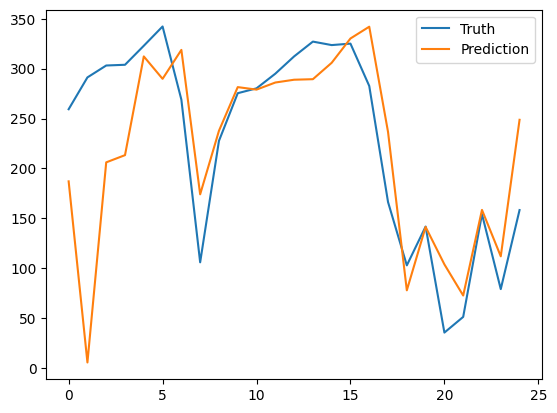

In [130]:
plt.plot(y_test_wave[:25])
plt.plot(preds_wave[:25])
plt.legend(['Truth', 'Prediction'])
plt.show()

In [131]:
preds_wave_cA = get_cA(preds_wave, num_level)
preds_wave_cD = get_cD(preds_wave, 1, num_level)
preds_wave_whole = (np.array(preds_wave_cA), np.array(preds_wave_cD))

In [132]:
preds_wave_whole

(array([187.08752 ,   5.597084, 206.12279 , 213.34589 , 312.26306 ,
        289.80432 , 318.81323 , 174.07922 , 237.71964 , 281.5086  ,
        279.0182  , 286.11505 , 288.9146  , 289.44745 , 305.87433 ,
        330.23956 , 342.03778 , 236.57803 ,  77.89432 , 141.43214 ,
        103.879814,  72.69448 , 158.48325 , 111.969986, 248.76402 ],
       dtype=float32),
 array([ 24.795347  ,  25.583572  ,   1.1745309 ,   0.151421  ,
        -21.60572   , -38.494606  ,  69.83615   ,  -3.457917  ,
        -18.062208  ,  19.961205  ,   0.90071946,  11.881088  ,
        -11.0250635 , -10.208772  ,  22.024504  ,  24.159384  ,
         25.316282  ,  -3.1523798 , -10.973447  , -13.02396   ,
        -61.875237  ,   5.324211  ,  13.138142  ,  18.187     ,
        -39.35669   ], dtype=float32))

In [133]:
preds = (pywt.waverec(preds_wave_whole, wavelet))

In [134]:
preds

array([149.8238  , 114.75789 ,  22.048054, -14.132581, 146.58134 ,
       144.9203  , 150.9654  , 150.75125 , 205.52577 , 236.08089 ,
       177.70279 , 232.1424  , 274.81662 , 176.05338 , 120.647484,
       125.53771 , 155.32126 , 180.86508 , 213.17134 , 184.94194 ,
       197.93256 , 196.65875 , 210.71509 , 193.91269 , 196.49757 ,
       212.08937 , 197.45157 , 211.88895 , 231.85948 , 200.71214 ,
       250.5979  , 216.43137 , 259.75854 , 223.9559  , 165.05687 ,
       169.515   ,  47.320198,  62.838997,  90.7983  , 109.21696 ,
        29.701717, 117.20651 ,  55.167545,  47.637974, 121.354645,
       102.774506,  92.03489 ,  66.31458 , 148.07335 , 203.7321  ],
      dtype=float32)

In [135]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds[i])

181.7732 ;  149.8238
184.99782 ;  114.75789
206.1224 ;  22.048054
205.76788 ;  -14.132581
211.9411 ;  146.58134
216.8105 ;  144.9203
212.9359 ;  150.9654
216.83131 ;  150.75125
225.20753 ;  205.52577
231.51094 ;  236.08089
238.07948 ;  177.70279
245.9639 ;  232.1424
239.48976 ;  274.81662
140.88992 ;  176.05338
49.2682 ;  120.647484
100.57517 ;  125.53771
141.76262 ;  155.32126
180.157 ;  180.86508
192.17154 ;  213.17134
197.31155 ;  184.94194
199.40543 ;  197.93256
196.97299 ;  196.65875
207.12653 ;  210.71509
210.013 ;  193.91269
218.36394 ;  196.49757
223.25606 ;  212.08937
225.77652 ;  197.45157
236.82887 ;  211.88895
231.34554 ;  231.85948
226.33461 ;  200.71214
232.58704 ;  250.5979
227.16072 ;  216.43137
227.47458 ;  259.75854
172.26237 ;  223.9559
122.32041 ;  165.05687
112.91762 ;  169.515
68.56082 ;  47.320198
76.97001 ;  62.838997
78.71203 ;  90.7983
121.80164 ;  109.21696
40.31911 ;  29.701717
9.952218 ;  117.20651
12.363579 ;  55.167545
60.140335 ;  47.637974
121.50542 ;  

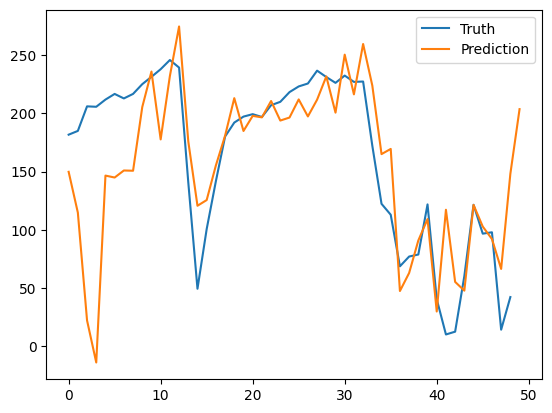

In [136]:
plt.plot(y_test)
plt.plot(preds)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [137]:
model.evaluate(X_test_wave, y_test_wave)

2/2 [==============================] - 0s 9ms/step - loss: 3205.5938 - mse: 3205.5938 - mae: 34.4317 - rmse: 56.6180 - rmspe: 10.5584 - mape: 340.8570


[3205.59375,
 3205.59375,
 34.43171691894531,
 56.61796188354492,
 10.558404922485352,
 340.8570251464844]

In [138]:
y_test_wave_cumsum = np.cumsum(y_test_wave)
y_test_wave_cumsum

array([ 259.34625,  550.5967 ,  853.76984, 1157.6611 , 1480.6099 ,
       1822.8801 , 2091.849  , 2197.8044 , 2425.436  , 2700.8423 ,
       2981.124  , 3276.0862 , 3588.3586 , 3915.47   , 4239.0986 ,
       4564.1895 , 4846.846  , 5013.1846 , 5116.0903 , 5257.875  ,
       5293.4224 , 5344.6904 , 5498.95   , 5578.064  , 5736.377  ,
       5734.0967 , 5734.347  , 5730.904  , 5728.1494 , 5723.6924 ,
       5718.117  , 5787.838  , 5751.5586 , 5724.4097 , 5720.775  ,
       5722.495  , 5720.454  , 5716.9946 , 5709.179  , 5712.7227 ,
       5716.5596 , 5755.6006 , 5762.2495 , 5756.303  , 5725.8345 ,
       5747.307  , 5713.524  , 5731.099  , 5790.3325 , 5691.579  ],
      dtype=float32)

In [139]:
preds_wave_cumsum = np.cumsum(preds_wave)
preds_wave_cumsum

array([ 187.08752,  192.6846 ,  398.80737,  612.15326,  924.4163 ,
       1214.2207 , 1533.0339 , 1707.1132 , 1944.8328 , 2226.3413 ,
       2505.3594 , 2791.4744 , 3080.389  , 3369.8364 , 3675.7107 ,
       4005.9502 , 4347.988  , 4584.566  , 4662.4604 , 4803.8926 ,
       4907.7725 , 4980.467  , 5138.95   , 5250.9204 , 5499.6846 ,
       5524.48   , 5550.0635 , 5551.238  , 5551.389  , 5529.783  ,
       5491.2886 , 5561.1245 , 5557.6665 , 5539.6045 , 5559.566  ,
       5560.467  , 5572.3477 , 5561.3228 , 5551.114  , 5573.138  ,
       5597.2974 , 5622.614  , 5619.4614 , 5608.488  , 5595.464  ,
       5533.589  , 5538.913  , 5552.0513 , 5570.2383 , 5530.882  ],
      dtype=float32)

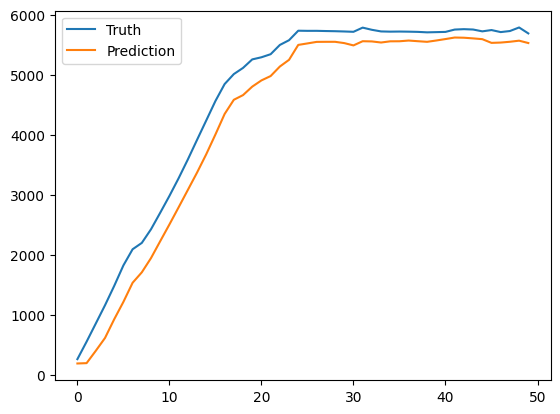

In [140]:
plt.plot(y_test_wave_cumsum)
plt.plot(preds_wave_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [141]:
rmspe_score_wave = rmspe(y_test_wave_cumsum, preds_wave_cumsum)
rmspe_score_wave

<tf.Tensor: shape=(), dtype=float32, numpy=0.1814155>

In [142]:
mape_score_wave = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cumsum, preds_wave_cumsum)
mape_score_wave

<tf.Tensor: shape=(), dtype=float32, numpy=11.547577>

In [143]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([ 181.7732 ,  366.771  ,  572.89343,  778.6613 ,  990.6024 ,
       1207.413  , 1420.3489 , 1637.1802 , 1862.3877 , 2093.8987 ,
       2331.9783 , 2577.9421 , 2817.432  , 2958.3218 , 3007.59   ,
       3108.1653 , 3249.928  , 3430.085  , 3622.2566 , 3819.568  ,
       4018.9736 , 4215.947  , 4423.073  , 4633.0864 , 4851.45   ,
       5074.706  , 5300.4824 , 5537.3115 , 5768.657  , 5994.9917 ,
       6227.5786 , 6454.7393 , 6682.214  , 6854.476  , 6976.7964 ,
       7089.714  , 7158.275  , 7235.245  , 7313.957  , 7435.759  ,
       7476.078  , 7486.0303 , 7498.394  , 7558.534  , 7680.0396 ,
       7776.69   , 7874.516  , 7888.5737 , 7930.689  ], dtype=float32)

In [144]:
preds_cumsum = np.cumsum(preds)
preds_cumsum

array([ 149.8238 ,  264.5817 ,  286.62976,  272.4972 ,  419.07855,
        563.99884,  714.96423,  865.71545, 1071.2412 , 1307.3221 ,
       1485.0249 , 1717.1672 , 1991.9839 , 2168.0374 , 2288.6848 ,
       2414.2224 , 2569.5437 , 2750.4087 , 2963.58   , 3148.522  ,
       3346.4546 , 3543.1133 , 3753.8284 , 3947.741  , 4144.239  ,
       4356.328  , 4553.78   , 4765.669  , 4997.5283 , 5198.24   ,
       5448.838  , 5665.269  , 5925.0273 , 6148.9834 , 6314.04   ,
       6483.555  , 6530.8755 , 6593.7144 , 6684.5127 , 6793.7295 ,
       6823.431  , 6940.6377 , 6995.805  , 7043.4434 , 7164.798  ,
       7267.5723 , 7359.607  , 7425.9214 , 7573.9946 , 7777.7266 ],
      dtype=float32)

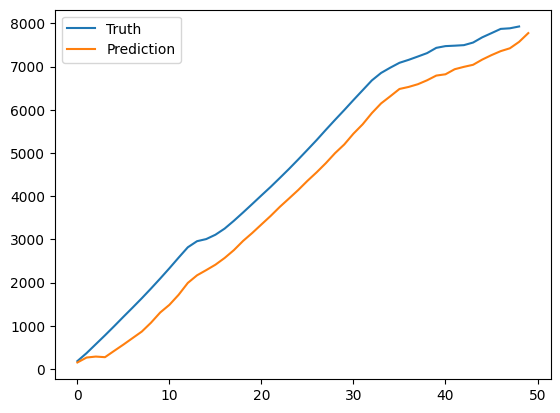

In [145]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [146]:
rmspe_score = rmspe(y_test_cumsum, preds_cumsum[:49])
rmspe_score

<tf.Tensor: shape=(), dtype=float32, numpy=0.25547656>

In [147]:
mape_score = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum[:49])
mape_score

<tf.Tensor: shape=(), dtype=float32, numpy=20.4424>

In [148]:
model.save('cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf')

In [149]:
!zip -r /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf".zip /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf"

updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/ (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/saved_model.pb (deflated 90%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/fingerprint.pb (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/keras_metadata.pb (deflated 90%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/assets/ (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/variables/ (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/variables/variables.data-00000-of-00001 (deflated 33%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/variables/variables.index (deflated 67%)


In [150]:
loaded_1 = tf.keras.models.load_model("cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf")

ValueError: ignored

In [ ]:
loaded_1.evaluate(X_test, y_test)

# data -> frequency

In [ ]:
def get_wave(data, mode, num_level):
  wave = []
  for i in range(len(data)):
    wave.append(pywt.wavedec([data[i]], mode, level = num_level))
  return np.array(wave).T[0]

In [ ]:
mode = 'haar'

## 1 levels

In [ ]:
num_level = 1

In [ ]:
lc_wave1 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave1

In [ ]:
# Plot cA
plt.plot(lc_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave1[1])
plt.show()

## 2 levels

In [ ]:
num_level = 2

In [ ]:
lc_wave2 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave2

In [ ]:
# Plot cA
plt.plot(lc_wave2[0])
plt.show()

In [ ]:
# Plot cD1
plt.plot(lc_wave2[1])
plt.show()

In [ ]:
# Plot cD2
plt.plot(lc_wave2[2])
plt.show()

## 3 levels

In [ ]:
num_level = 3

In [ ]:
lc_wave3 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave3

In [ ]:
# Plot cA
plt.plot(lc_wave3[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave3[1])
plt.show()

In [ ]:
plt.plot(lc_wave1[0])
plt.plot(lc_wave2[0])
plt.plot(lc_wave3[0])
plt.legend(['A1', 'A2', 'A3'])
plt.show()

# **Temperature**

# data -> frequency

## level 1

In [ ]:
num_level = 1

In [ ]:
temp_wave1 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave1

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave1[1])
plt.show()

## level 2

In [ ]:
num_level = 2

In [ ]:
temp_wave2 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave2

In [ ]:
# Plot cA
plt.plot(temp_wave2[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave2[1])
plt.show()

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.plot(temp_wave2[0])
plt.show()